In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('covid_al_160521.csv', low_memory=False)

In [3]:
data.head()

,_id,id,etnia,sexo,municipio_residencia,classificacao,situacao_atual,data_resultado_exame,data_atendimento,tipo_coleta,...,idoso,profissional_saude,obesidade,doenca_renal_cronica,doenca_auto_imune,asma,sem_comorbidade,fator_nao_informado,outros_fatores,pneumopatia
0,1,1,Ignorado,Masculino,Maceió,Confirmado,Encerramento do Isolamento Domiciliar,2020-03-08T03:00:00,2020-03-04T03:00:00,Swab nasofaringe + RT-PCR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Ignorado,Masculino,Maceió,Confirmado,Encerramento do Isolamento Domiciliar,2020-03-18T03:00:00,2020-03-14T03:00:00,Swab nasofaringe + RT-PCR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Ignorado,Feminino,Maceió,Confirmado,Encerramento do Isolamento Domiciliar,2020-03-18T03:00:00,2020-03-14T03:00:00,Swab nasofaringe + RT-PCR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
3,4,4,Ignorado,Feminino,Maceió,Confirmado,Óbito,2020-04-16T03:00:00,2020-03-14T03:00:00,Swab nasofaringe + RT-PCR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,Ignorado,Masculino,Maceió,Confirmado,Óbito,2020-03-31T03:00:00,2020-03-16T03:00:00,Swab nasofaringe + RT-PCR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns.values

array(['_id', 'id', 'etnia', 'sexo', 'municipio_residencia',
       'classificacao', 'situacao_atual', 'data_resultado_exame',
       'data_atendimento', 'tipo_coleta', 'idade', 'data_obito',
       'data_confirmacao_obito', 'ausegia', 'anosmia', 'febre', 'tosse',
       'cefaleia', 'dificuldade_respiratoria', 'dispineia', 'mialgia',
       'saturacao_menor_noventa_cinco', 'adinofagia', 'diarreia',
       'adinamia', 'nausea_vomito', 'coriza', 'congestao_nasal',
       'calafrio', 'nao_informado', 'outros', 'doenca_cardiovascular',
       'diabetes', 'doenca_respiratoria_cronica', 'hipertensao',
       'paciente_oncologico', 'idoso', 'profissional_saude', 'obesidade',
       'doenca_renal_cronica', 'doenca_auto_imune', 'asma',
       'sem_comorbidade', 'fator_nao_informado', 'outros_fatores',
       'pneumopatia'], dtype=object)

In [5]:
status = data.groupby(['situacao_atual']).size()
status

situacao_atual
Alta Hospitalar                            4084
Alta Médica                                 732
Encerramento do Isolamento Domiciliar     14917
Internação Leito Clínico                   2477
Internação UTI                              760
Isolamento Domiciliar                    121889
Óbito                                      3198
dtype: int64

In [6]:
ages = data.groupby(['idade']).size()
ages

idade
-7695.0    1
-7634.0    1
-7544.0    1
-6399.0    1
-5789.0    1
          ..
 1822.0    1
 1935.0    1
 1975.0    1
 2001.0    1
 6870.0    1
Length: 174, dtype: int64

In [7]:
data = data[data.idade >= 0]
data = data[data.idade <= 120]

ages = data.groupby(['idade']).size()
ages

idade
1.0      527
2.0      483
3.0      418
4.0      375
5.0      410
        ... 
105.0      5
106.0      4
107.0      1
108.0      4
109.0      1
Length: 109, dtype: int64

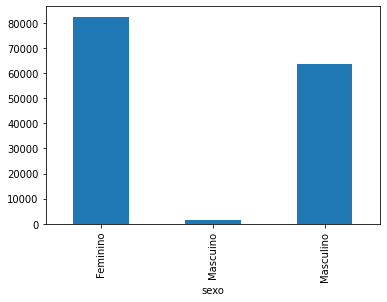

In [8]:
gender = data.groupby(['sexo']).size()
gender

gender.plot.bar()
plt.show()

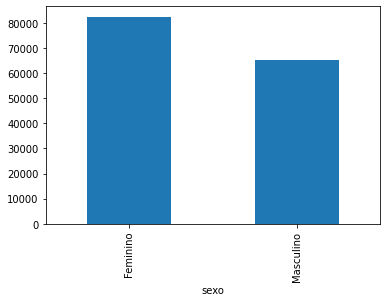

In [9]:
data.loc[data['sexo'] == 'Mascuino', 'sexo'] = "Masculino"

gender = data.groupby(['sexo']).size()
gender.plot.bar()
plt.show()

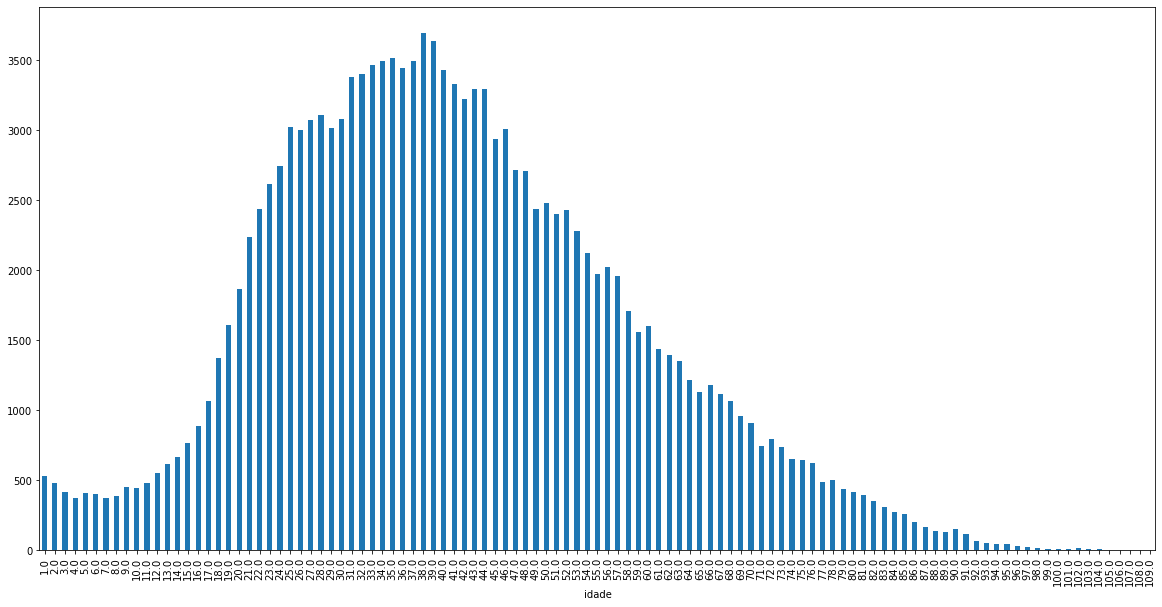

In [10]:
ages.plot.bar(figsize=(20,10))
plt.show()


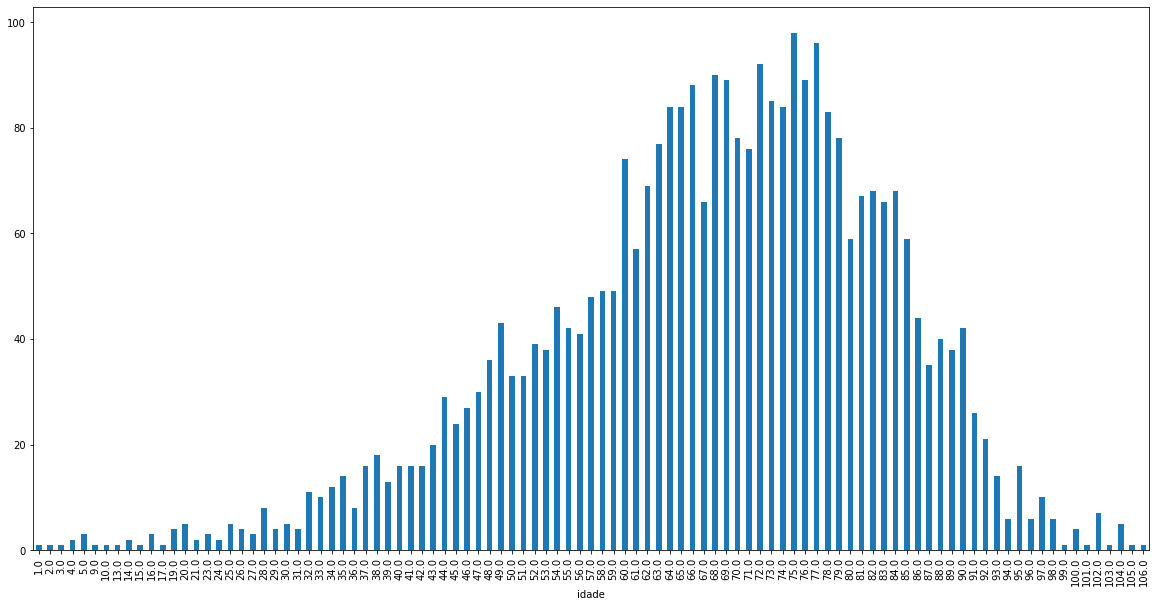

In [11]:
deaths = data[data.situacao_atual == 'Óbito']

ages2 = deaths.groupby(['idade']).size()
ages2.plot.bar(figsize=(20,10))
plt.show()